In [57]:
#Importing necessary libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#For confusion matrices

from sklearn.metrics import confusion_matrix

In [58]:
df = pd.read_csv("C:/Users/dell/OneDrive/Documents/Machine Learning class/risk_factors_cervical_cancer.csv")

# Cleaning the dataset for NaN values

In [59]:
df.drop(columns = ['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], inplace = True)

In [60]:
df.drop(columns = ['Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs'], inplace = True)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   No. of sexual partners              858 non-null    object
 2   1st sexual intercourse              858 non-null    object
 3   No. of pregnancies                  858 non-null    object
 4   Smokes (years)                      858 non-null    object
 5   Smokes (packs/year)                 858 non-null    object
 6   Hormonal Contraceptives (years)     858 non-null    object
 7   IUD (years)                         858 non-null    object
 8   STDs (number)                       858 non-null    object
 9   STDs:condylomatosis                 858 non-null    object
 10  STDs:cervical condylomatosis        858 non-null    object
 11  STDs:vaginal condylomatosis         858 non-null    object

In [62]:
#Checking for NaN values

df[df['STDs (number)'] == '?']

,Age,No. of sexual partners,1st sexual intercourse,No. of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs:condylomatosis,...,STDs:HPV,STDs: No. of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
71,34,?,?,3,0,0,?,?,?,?,...,?,0,0,0,0,0,0,0,0,0
74,35,2,17,2,15,0.32,?,?,?,?,...,?,0,0,0,0,0,0,0,0,0
90,36,1,13,6,0,0,?,?,?,?,...,?,0,0,0,0,0,0,0,0,0
95,31,4,16,2,0,0,?,?,?,?,...,?,0,0,0,0,0,0,0,0,0
98,31,1,20,5,0,0,?,?,?,?,...,?,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,23,3,15,1,5,0.75,?,?,?,?,...,?,0,0,0,0,0,0,0,0,0
794,20,2,16,1,0,0,?,?,?,?,...,?,0,0,0,0,0,0,0,0,0
807,36,2,18,?,19,7.6,8,?,?,?,...,?,0,0,0,0,0,0,0,0,0
814,16,1,12,?,0,0,0.42,?,?,?,...,?,0,0,0,0,0,0,0,0,1


In [63]:
#Eliminating NaN values

df = df.replace({'?': np.nan}).dropna().astype(float)

In [64]:
df

,Age,No. of sexual partners,1st sexual intercourse,No. of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs:condylomatosis,...,STDs:HPV,STDs: No. of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18.0,4.0,15.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,1.0,14.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,52.0,5.0,16.0,4.0,37.0,37.0,3.00,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,46.0,3.0,21.0,4.0,0.0,0.0,15.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,42.0,3.0,23.0,2.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34.0,3.0,18.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
854,32.0,2.0,19.0,1.0,0.0,0.0,8.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
855,25.0,2.0,17.0,0.0,0.0,0.0,0.08,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
856,33.0,2.0,24.0,2.0,0.0,0.0,0.08,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
#Resetting the index

df.reset_index(inplace = True)

In [66]:
df.isna()

,index,Age,No. of sexual partners,1st sexual intercourse,No. of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),...,STDs:HPV,STDs: No. of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
664,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
665,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
666,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Feature selection of 10 best features using forward wrapper method

In [76]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [77]:
y = df.Biopsy.values
x = df.drop(["index", "Biopsy"],axis=1)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify =y )
X_train.shape, X_test.shape

((534, 29), (134, 29))

In [79]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train) 

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [80]:
sfs = SFS(LogisticRegression(),
           k_features = 10,
           forward= True,
           floating= False,
           verbose= 2,
           scoring= 'accuracy',
           cv = 5,
           n_jobs = -1
           ).fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    0.3s finished

[2022-11-26 02:20:14] Features: 1/10 -- score: 0.9569035443484395[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    0.2s finished

[2022-11-26 02:20:14] Features: 2/10 -- score: 0.9569035443484395[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  27 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    0.5s finished

[2022-11-26 02:20:15] Features: 3/10 -- score: 0.9587903368012697[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    0.5s finished

[2022-11-26 02:20:16] Features: 4/10 -- score: 0.9587903368012697[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent 

In [81]:
sfs.k_score_

0.9587903368012697

In [82]:
sfs.k_feature_names_

('1st sexual intercourse',
 'STDs:cervical condylomatosis',
 'STDs:vaginal condylomatosis',
 'STDs:syphilis',
 'STDs:pelvic inflammatory disease',
 'STDs:genital herpes',
 'STDs:molluscum contagiosum',
 'STDs:AIDS',
 'STDs:Hepatitis B',
 'Schiller')

# 1) Logistic regression

In [84]:
#Defining x and y

y = df['Biopsy'].values
x = df[['1st sexual intercourse','STDs:cervical condylomatosis','STDs:vaginal condylomatosis','STDs:syphilis','STDs:pelvic inflammatory disease','STDs:genital herpes','STDs:molluscum contagiosum','STDs:AIDS','STDs:Hepatitis B','Schiller']].values

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

method_names = []
method_scores = []

Logistic Regression Classification Test Accuracy is 0.9477611940298507


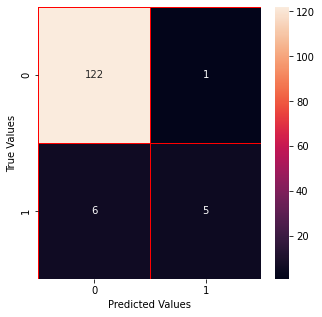

In [86]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train) 

print("Logistic Regression Classification Test Accuracy is {}".format(log_reg.score(X_test,y_test)))

method_names.append("Logistic Reg.")
method_scores.append(log_reg.score(X_test,y_test))


#Confusion Matrix

y_pred = log_reg.predict(X_test)
conf_mat = confusion_matrix(y_test,y_pred)

#Visualization of Confusion Matrix

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

# 2) SVM

SVM Classification Score is: 0.917910447761194


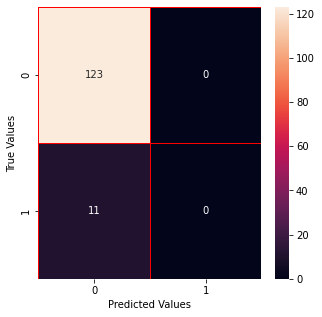

In [87]:
from sklearn.svm import SVC

svm = SVC(random_state=42)
svm.fit(X_train,y_train)

print("SVM Classification Score is: {}".format(svm.score(X_test, y_test)))
method_names.append("SVM")
method_scores.append(svm.score(X_test, y_test))

#Confusion Matrix

y_pred = svm.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)

#Visualization of Confusion Matrix

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

# 3) Decision Tree classification

Decision Tree Classification Score:  0.9776119402985075


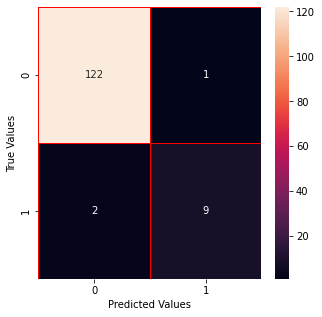

In [88]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

print("Decision Tree Classification Score: ",dt.score(X_test,y_test))
method_names.append("Decision Tree")
method_scores.append(dt.score(X_test,y_test))

#Confusion Matrix

y_pred = dt.predict(X_test)
conf_mat = confusion_matrix(y_test,y_pred)

#Visualization of Confusion Matrix

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)

plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

# 4) Random Forest classification

Random Forest Classification Score:  0.9701492537313433


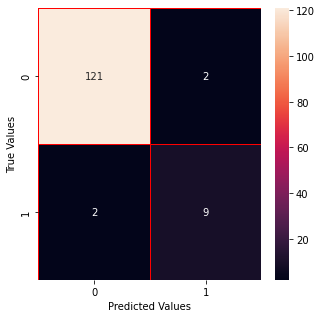

In [89]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train,y_train)

print("Random Forest Classification Score: ",rf.score(X_test,y_test))
method_names.append("Random Forest")
method_scores.append(rf.score(X_test,y_test))

#Confusion Matrix

y_pred = rf.predict(X_test)
conf_mat = confusion_matrix(y_test,y_pred)

#Visualization of Confusion Matrix

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)

plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

# 5) KNN (K-Nearest Neighbour) Classification

Score for Number of Neighbors = 5: 0.9626865671641791


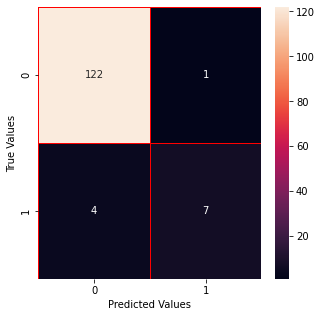

In [90]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train,y_train)
print("Score for Number of Neighbors = 5: {}".format(knn.score(X_test,y_test)))

method_names.append("KNN")
method_scores.append(knn.score(X_test,y_test))

#Confusion Matrix

y_pred = knn.predict(X_test)
conf_mat = confusion_matrix(y_test,y_pred)

#Visualization of Confusion Matrix

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)

plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()